<a href="https://colab.research.google.com/github/CiaraFarrellSETU/phd/blob/main/Lough_Owel_Summer_site1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install rasterio if you haven't already
!pip install rasterio matplotlib numpy

In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import os # For checking file existence

In [ ]:
RGB_FILE_PATH = '/ortho.tif'
NDVI_FILE_PATH = '/Loughowel_Site1_Summer_NDVI.tif'

In [ ]:
print(f"Attempting to load RGB from: {RGB_FILE_PATH}")
print(f"Attempting to load NDVI from: {NDVI_FILE_PATH}")

Attempting to load RGB from: /ortho.tif
Attempting to load NDVI from: /Loughowel_Site1_Summer_NDVI.tif


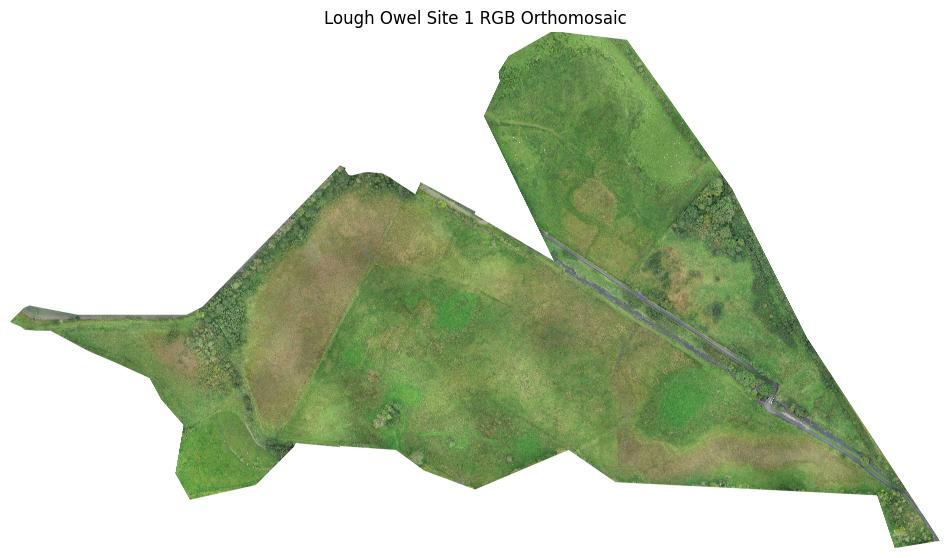


RGB Image Metadata:
  CRS: EPSG:2157
  Transform: | 0.03, 0.00, 641586.55|
| 0.00,-0.03, 756539.80|
| 0.00, 0.00, 1.00|
  Width: 30985, Height: 17196
  Number of bands: 3
  Data type: uint8


In [ ]:
if os.path.exists(RGB_FILE_PATH):
    try:
        with rasterio.open(RGB_FILE_PATH) as src_rgb:
            # Read the RGB bands. Assuming order is RGB (1, 2, 3)
            # If your TIFF is RGBA, you might read (1, 2, 3) or (1, 2, 3, 4)
            # and potentially exclude the alpha band.
            # src_rgb.read() will read all bands.
            rgb_img = src_rgb.read()

            # For display, we often need to reorder bands to (height, width, channels)
            # and normalize/scale values if not already uint8
            if rgb_img.shape[0] == 3: # Check if it's 3 bands (channels first)
                rgb_display = np.transpose(rgb_img, (1, 2, 0))
            elif rgb_img.shape[0] == 4: # If it's RGBA, take first 3 bands
                 rgb_display = np.transpose(rgb_img[:3, :, :], (1, 2, 0))
            else:
                print(f"Warning: RGB image has {rgb_img.shape[0]} bands. Display might not be optimal.")
                rgb_display = np.transpose(rgb_img, (1, 2, 0))

            # Normalize to 0-255 if not already
            if rgb_display.dtype != np.uint8:
                rgb_display = (rgb_display / np.max(rgb_display) * 255).astype(np.uint8)

            plt.figure(figsize=(12, 12))
            plt.imshow(rgb_display)
            plt.title('Lough Owel Site 1 RGB Orthomosaic') # cite: 1
            plt.axis('off')
            plt.show()

            print("\nRGB Image Metadata:")
            print(f"  CRS: {src_rgb.crs}")
            print(f"  Transform: {src_rgb.transform}")
            print(f"  Width: {src_rgb.width}, Height: {src_rgb.height}")
            print(f"  Number of bands: {src_rgb.count}")
            print(f"  Data type: {src_rgb.dtypes[0]}")

    except rasterio.errors.RasterioIOError as e:
        print(f"Error loading RGB file with rasterio: {e}")
        print("Please ensure the file is a valid GeoTIFF and the path is correct.")
    except Exception as e:
        print(f"An unexpected error occurred while processing RGB: {e}")
else:
    print(f"RGB file not found at {RGB_FILE_PATH}.")

In [ ]:
##if os.path.exists(NDVI_FILE_PATH):
    ##try:
        ##with rasterio.open(NDVI_FILE_PATH) as src_ndvi:
            # NDVI data is typically a single band
            #ndvi_data = src_ndvi.read(1) # Read the first band

            # Optional: Handle NoData values if present
            #if src_ndvi.nodata is not None:
                #ndvi_data = np.where(ndvi_data == src_ndvi.nodata, np.nan, ndvi_data)

            # Display NDVI. Using a common colormap for NDVI.
            #plt.figure(figsize=(12, 12))
            #plt.imshow(ndvi_data, cmap='RdYlGn', vmin=-1, vmax=1) # Common range for NDVI is -1 to 1
            #plt.colorbar(label='NDVI Value')
            #plt.title('Lough Owel Site 1 NDVI Map')
            #plt.axis('off')
            #plt.show()

           # print("\nNDVI Image Metadata:")
            #print(f"  CRS: {src_ndvi.crs}")
            #print(f"  Transform: {src_ndvi.transform}")
            #print(f"  Width: {src_ndvi.width}, Height: {src_ndvi.height}")
            #print(f"  Number of bands: {src_ndvi.count}")
            #print(f"  Data type: {src_ndvi.dtypes[0]}")

            # You can also get statistics
            #print(f"\nNDVI Statistics:")
            #print(f"  Min NDVI: {np.nanmin(ndvi_data):.3f}")
            #print(f"  Max NDVI: {np.nanmax(ndvi_data):.3f}")
            #print(f"  Mean NDVI: {np.nanmean(ndvi_data):.3f}")

   # except rasterio.errors.RasterioIOError as e:
    #    print(f"Error loading NDVI file with rasterio: {e}")
     #   print("Please ensure the file is a valid GeoTIFF and the path is correct.")
    #except Exception as e:
     #   print(f"An unexpected error occurred while processing NDVI: {e}")
#else:
   # print(f"NDVI file not found at {NDVI_FILE_PATH})")

In [ ]:
if os.path.exists(NDVI_FILE_PATH):
    try:
        with rasterio.open(NDVI_FILE_PATH) as src_ndvi:
            ndvi_data = src_ndvi.read(1) # Read the single NDVI band

            # Handle NoData values (replace with NaN for correct statistics)
            if src_ndvi.nodata is not None:
                ndvi_data = np.where(ndvi_data == src_ndvi.nodata, np.nan, ndvi_data)

            # Calculate statistics, ignoring NaN values
            min_ndvi = np.nanmin(ndvi_data)
            max_ndvi = np.nanmax(ndvi_data)
            mean_ndvi = np.nanmean(ndvi_data)
            std_ndvi = np.nanstd(ndvi_data)
            median_ndvi = np.nanmedian(ndvi_data)

            print(f"NDVI Statistics for {NDVI_FILE_PATH}:")
            print(f"  Min: {min_ndvi:.3f}")
            print(f"  Max: {max_ndvi:.3f}")
            print(f"  Mean: {mean_ndvi:.3f}")
            print(f"  Standard Deviation: {std_ndvi:.3f}")
            print(f"  Median: {median_ndvi:.3f}")

            # You can also calculate percentiles
            p10 = np.nanpercentile(ndvi_data, 10)
            p90 = np.nanpercentile(ndvi_data, 90)
            print(f"  10th Percentile: {p10:.3f}")
            print(f"  90th Percentile: {p90:.3f}")


    except rasterio.errors.RasterioIOError as e:
        print(f"Error loading NDVI file with rasterio: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
else:
    print(f"NDVI file not found at {NDVI_FILE_PATH}")

NDVI Statistics for /Loughowel_Site1_Summer_NDVI.tif:
  Min: -0.112
  Max: 0.962
  Mean: 0.805
  Standard Deviation: 0.075
  Median: 0.817
  10th Percentile: 0.740
  90th Percentile: 0.871


In [ ]:
if ndvi_data is not None:
    # Define NDVI thresholds for Lough Owel Site 1 based on statistical outputs.
    # These are refined examples; adjust further as needed for your specific analysis goals.
    NON_VEGETATED_THRESHOLD = 0.15      # Includes water, bare soil, very low vigor (e.g., Min: -0.112)
    SPARSE_VEG_THRESHOLD = 0.3          # Areas with some sparse cover or stressed vegetation
    MODERATE_VEG_THRESHOLD = 0.6        # Mid-range vegetation, e.g., grasslands, mixed areas
    HEALTHY_VEG_THRESHOLD = 0.8         # Good, thriving vegetation (around your 10th percentile 0.740)

    # Create a classified array, initializing with NaN for areas that are not classified
    # or will remain NoData from the original input.
    classified_ndvi = np.full(ndvi_data.shape, np.nan, dtype=np.uint8) # Use uint8 for categories

    # Apply classification rules
    # Category 1: Non-Vegetated/Very Low Vigor
    classified_ndvi[ndvi_data <= NON_VEGETATED_THRESHOLD] = 1
    # Category 2: Sparse/Poor Vegetation
    classified_ndvi[(ndvi_data > NON_VEGETATED_THRESHOLD) & (ndvi_data <= SPARSE_VEG_THRESHOLD)] = 2
    # Category 3: Moderate Vegetation
    classified_ndvi[(ndvi_data > SPARSE_VEG_THRESHOLD) & (ndvi_data <= MODERATE_VEG_THRESHOLD)] = 3
    # Category 4: Healthy Vegetation
    classified_ndvi[(ndvi_data > MODERATE_VEG_THRESHOLD) & (ndvi_data <= HEALTHY_VEG_THRESHOLD)] = 4
    # Category 5: Very Healthy/Lush Vegetation
    classified_ndvi[ndvi_data > HEALTHY_VEG_THRESHOLD] = 5

    print("\nVegetation Health Categories Defined:")
    print(f"  1: Non-Vegetated/Very Low Vigor (NDVI <= {NON_VEGETATED_THRESHOLD})")
    print(f"  2: Sparse/Poor Vegetation ({NON_VEGETATED_THRESHOLD} < NDVI <= {SPARSE_VEG_THRESHOLD})")
    print(f"  3: Moderate Vegetation ({SPARSE_VEG_THRESHOLD} < NDVI <= {MODERATE_VEG_THRESHOLD})")
    print(f"  4: Healthy Vegetation ({MODERATE_VEG_THRESHOLD} < NDVI <= {HEALTHY_VEG_THRESHOLD})")
    print(f"  5: Very Healthy/Lush Vegetation (NDVI > {HEALTHY_VEG_THRESHOLD})")

/usr/local/lib/python3.11/dist-packages/numpy/_core/numeric.py:362: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')



Vegetation Health Categories Defined:
  1: Non-Vegetated/Very Low Vigor (NDVI <= 0.15)
  2: Sparse/Poor Vegetation (0.15 < NDVI <= 0.3)
  3: Moderate Vegetation (0.3 < NDVI <= 0.6)
  4: Healthy Vegetation (0.6 < NDVI <= 0.8)
  5: Very Healthy/Lush Vegetation (NDVI > 0.8)


In [ ]:
if ndvi_data is not None:
    # --- Get unique categories and their counts ---
    # np.unique with return_counts=True gives unique values and how many times they appear.
    # We filter out NaN values before counting to only include classified pixels.
    unique_categories, counts = np.unique(classified_ndvi[~np.isnan(classified_ndvi)], return_counts=True)
    category_counts = dict(zip(unique_categories, counts))

    # Calculate the total number of pixels that were actually classified (not NaN)
    total_classified_pixels = np.nansum(counts)

    print("\nPixel Counts by Category:")
    # Define a dictionary to map category IDs to human-readable names
    category_names = {

        1: "Non-Vegetated/Very Low Vigor",
        2: "Sparse/Poor Vegetation",
        3: "Moderate Vegetation",
        4: "Healthy Vegetation",
        5: "Very Healthy/Lush Vegetation"
    }

    # Iterate through the sorted category IDs to print results consistently
    for category_id in sorted(category_counts.keys()):
        count = category_counts[category_id]
        # Calculate percentage, handling division by zero if no pixels were classified
        percentage = (count / total_classified_pixels) * 100 if total_classified_pixels > 0 else 0
        # Get the descriptive name for the category, or a fallback if not found
        name = category_names.get(category_id, f"Unknown Category {int(category_id)}")
        print(f"  {name}: {int(count)} pixels ({percentage:.2f}%)")

else:
    print("Classification skipped because NDVI data could not be loaded.")


Pixel Counts by Category:
  Unknown Category 0: 106678972 pixels (50.90%)
  Non-Vegetated/Very Low Vigor: 6155 pixels (0.00%)
  Sparse/Poor Vegetation: 193300 pixels (0.09%)
  Moderate Vegetation: 1743306 pixels (0.83%)
  Healthy Vegetation: 36198599 pixels (17.27%)
  Very Healthy/Lush Vegetation: 64757418 pixels (30.90%)
